In [1]:
from OpenMSTools.ms_tools import (
    OpenMSDataWrapper,
    TICSmoother,
    FeatureFinder,
    FeatureLinker,
    RTAligner,
    AdductDetector,
    SpectrumNormalizer,
)
import matplotlib.pyplot as plt

def plot_2d_line_chart(x_data, y_data, title='XIC', x_label='RT', y_label='I'):
    """
    绘制二维折线图

    参数:
    x_data (list or array-like): X轴数据
    y_data (list or array-like): Y轴数据
    title (str): 图表标题
    x_label (str): X轴标签
    y_label (str): Y轴标签
    """
    plt.figure(figsize=(10, 6))  # 设置图形大小
    plt.plot(x_data, y_data, marker='o', linestyle='-', markersize=0.5)  # 绘制折线图
    plt.title(title)  # 设置标题
    plt.xlabel(x_label)  # 设置X轴标签
    plt.ylabel(y_label)  # 设置Y轴标签
    plt.grid(True)  # 显示网格
    plt.show()  # 显示图表

In [2]:
qc_datas = OpenMSDataWrapper(
    file_paths=[
        "../data/raw_files/QC1.mzML",
        "../data/raw_files/QC2.mzML"
    ]
)
qc_datas.init_exps()
qc_datas = TICSmoother()(qc_datas)
qc_datas = FeatureFinder()(qc_datas)
qc_datas.infer_ref_feature_for_align()
qc_datas = RTAligner()(qc_datas)
qc_datas = FeatureLinker()(qc_datas)

Progress of 'mass trace detection':
-- done [took 0.24 s (CPU), 0.23 s (Wall)] -- 
Progress of 'mass trace detection':
-- done [took 0.20 s (CPU), 0.20 s (Wall)] -- 
Progress of 'elution peak detection':
-- done [took 0.93 s (CPU), 0.05 s (Wall)] -- 
Progress of 'elution peak detection':
-- done [took 1.04 s (CPU), 0.05 s (Wall)] -- 
Progress of 'assembling mass traces to features':
Loading metabolite isotope model with 5% RMS error
-- done [took 1.56 s (CPU), 0.08 s (Wall)] -- 
Progress of 'assembling mass traces to features':
-- done [took 1.44 s (CPU), 0.07 s (Wall)] -- 
Progress of 'Linking features':
-- done [took 0.03 s (CPU), 0.03 s (Wall)] -- 


In [27]:
for chrom in qc_datas.chromatogram_peaks[0][4]:
    print(chrom.getPrecursor().getMZ())

467.29553351039425
467.29553351039425


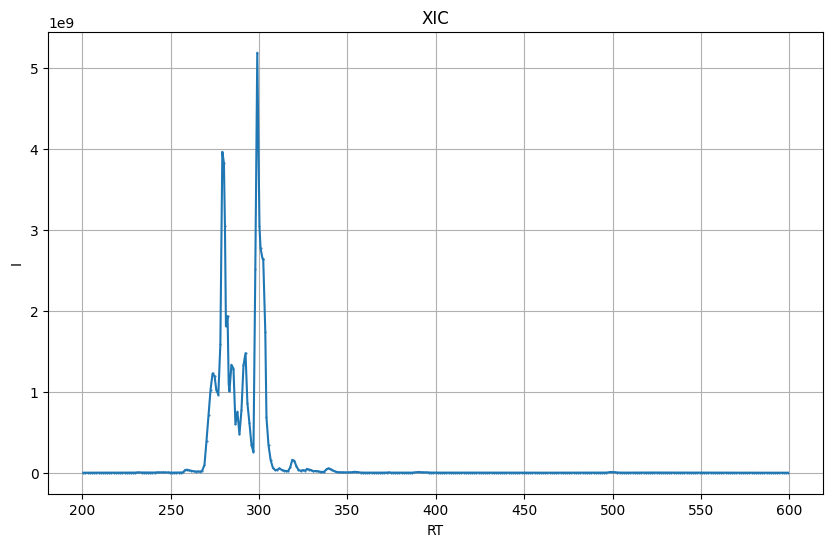

In [56]:
plot_2d_line_chart(*qc_datas.exps[0].calculateTIC().get_peaks())